In [31]:
import numpy as np
from matplotlib import pyplot as plt
from py import opt, read
from hypergraph import hypergraph
from py.utils import *
import pathlib
import networkx as nx
from scipy.optimize import root, approx_fprime
from cProfile import run

from scipy.linalg import eig

from scipy.stats import zipf
%matplotlib inline

import sys
sys.version

'3.5.2 (default, Oct  8 2019, 13:06:37) \n[GCC 5.4.0 20160609]'

123 degeneracies removed, 0 remain.


Text(0.5, 1.0, 'Degree Sequence')

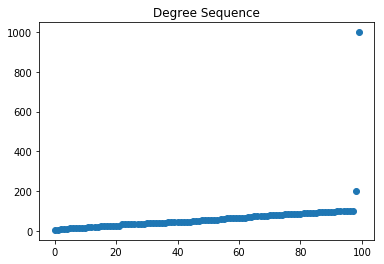

In [16]:
# construct a degree sequence

n = 100  # number of nodes

deg = (np.random.rand(n))**4
deg += np.random.randint(1, n, n)
deg = deg / 2
deg = deg.astype(int) + 1
deg = deg * 2
deg[9:10] = 1000


deg[80] = 200

# use nx.configuration model to make a multigraph, then represent as hypergraph
g = nx.configuration_model(deg)
e = list(g.edges())

G = hypergraph.hypergraph(e)
G.remove_degeneracy()        # remove self-loops
d = G.node_degrees()
d = np.sort(d)
n = len(d)


plt.scatter(np.arange(n), np.sort(d))
plt.title('Degree Sequence')

In [17]:
# use copies of a star graph
k_copies = 10

j_leaves = 100

d = np.repeat(np.concatenate(([j_leaves], np.repeat(1, j_leaves))), k_copies)
n = len(d)

In [18]:
np.random.seed(seed=12345)

# zipf-distributed

n = 200

d1 = zipf.rvs(a = 2, size=n)
d1 = 2*d1
d1 = np.sort(d1)

In [19]:
np.random.seed(seed=12345)

# zipf-distributed

n = 200

d2 = np.random.randint(n/4, size = n) + 1
# d2 = (d2/50) ** 4
d2 = 2*d2
d2 = np.sort(d2)

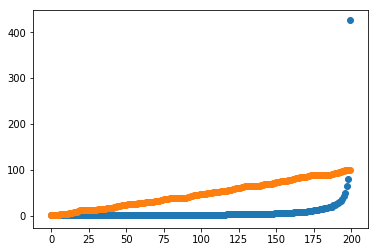

In [20]:
plt.scatter(np.arange(n), d1)
plt.scatter(np.arange(n), d2)

Successfully converged within tolerance 0.01 in 3 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within t

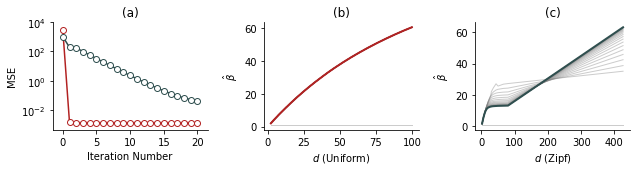

In [21]:
fig = plt.figure(figsize = (9, 2.5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)



b1 = np.ones(n)

obj = opt.mse(b1, d1)


color = 'grey'
alpha = .4
size = 1

ax2.plot(d1, b1, color = color, linewidth = size, alpha = alpha)

steps = 20
interval = 5

v1 = np.zeros(steps+1)
v2 = np.zeros(steps+1)

v1[0] = obj

for i in range(steps):
    b1, obj = opt.compute_b(d1, alpha = 0.05, 
                           message_every = 100, 
                           b0 = b1, 
                           max_steps = interval, 
                           tol = .01)
    v1[i+1] = obj
    if i == steps - 1:
        color = 'darkslategrey'
        alpha = 1
        size = 2
    
    ax2.plot(d1, b1, color = color, linewidth = size, alpha = alpha)
    
#     ax1.scatter([i], [obj], edgecolor = 'darkslategrey', color = 'white')
    ax1.semilogy()
    
b2 = np.ones(n)


obj = opt.mse(b2, d2)

color = 'grey'
alpha = .4
size = 1

ax3.plot(d2, b2, color = color, linewidth = size, alpha = alpha)

v2[0] = obj

for i in range(steps):
    b2, obj = opt.compute_b(d2, alpha = 0.2, 
                           message_every = 100, 
                           b0 = b2, 
                           max_steps = interval, 
                           tol = .01)
    v2[i+1] = obj
    if i == steps - 1:
        color = 'firebrick'
        alpha = 1
        size = 2
    
    ax3.plot(d2, b2, color = color, linewidth = size, alpha = alpha)
        
        
ax1.plot(np.arange(steps+1), v1, color = 'darkslategrey', zorder = 1)
ax1.scatter(np.arange(steps+1), v1, facecolors = 'white', edgecolors = 'darkslategrey', zorder = 2)
ax1.plot(np.arange(steps+1), v2, color = 'firebrick', zorder = 1)
ax1.scatter(np.arange(steps+1), v2, facecolors = 'white', edgecolors = 'firebrick', zorder = 2)


ax1.set(xlabel = 'Iteration Number',
        ylabel = 'MSE', 
        title = '(a)')

ax2.set(xlabel = r'$d$ (Zipf)',
        ylabel = r'$\hat{\beta}$',
        title = '(c)')

ax3.set(xlabel = r'$d$ (Uniform)',
        ylabel = r'$\hat{\beta}$',
        title = '(b)')

for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig('fig/convergence.png', dpi = 300)

370.2212965727941
562.4387503514677
561.3022180988338
13.908207606674647
198.83249385385716
1.0480667192045e-19
1.0480667192045e-19 -- infeasible
1.1873907050890562e-21
1.1873907050890562e-21 -- infeasible
162.98414676257966
397.59016561960146
999.0725985607183
159.09390958774367
584.5452864827089
8.810036552600617e-16
8.810036552600617e-16 -- infeasible
0.2809283619254668
4.276426022125482e-17
4.276426022125482e-17 -- infeasible
699.5149547229468
111.82747553417798
2.1679816628646706e-17
2.1679816628646706e-17 -- infeasible
3.2131944970550707e-14
3.2131944970550707e-14 -- infeasible
770.3705086709988


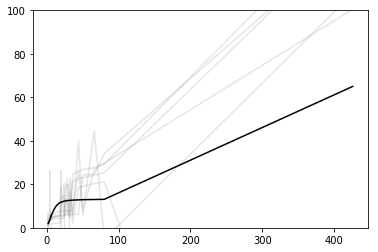

In [22]:
n_feasible = 0

for i in range(20):
    b_ = root(lambda b: opt.degree_estimate(b) - d1, x0 = np.random.rand(n))['x']

    obj = opt.mse(b_, d1)
    print(obj)
    if obj < 0.01:
        if opt.check_feasible(b_):
            color = 'black'
            alpha = 1
            n_feasible += 1
            print(str(obj) + str(' -- feasible'))
        else:
            color = 'grey'
            alpha = .2
            print(str(obj) + str(' -- infeasible'))
        plt.plot(d1, b_, color = color, alpha = alpha)
plt.gca().set(ylim = (0, 100))
    
b_ = root(lambda b: opt.degree_estimate(b) - d1, x0 = b1)['x']
plt.plot(d1, b_, color = 'black', alpha = 1)

In [24]:
def star_graph_sequence(k_copies = 1, j_leaves = 2):

    d = np.repeat(np.concatenate(([j_leaves], np.repeat(1, j_leaves))), k_copies)
    return(d)

In [21]:
# b_ = root(lambda b: opt.degree_estimate(b) - d, x0 = np.random.rand(n))['x']

M = np.zeros((5,5))

for i in range(1, 6):
    for j in range(1, 6):
        d = star_graph_sequence(i+1, j)
        n = len(d)

#         b_, obj = opt.compute_b(d, message_every = 10000, alpha = .001, max_steps = 10**3)
        b_ = -1
        obj = 2
        while np.min(b_) < .5:
            b_ = root(lambda b: opt.degree_estimate(b) - d, x0 = np.ones(n))['x']
            obj = opt.mse(b_, d)
        M[i-1,j-1] = np.min(b_)
#         M[i-1,j-1] = obj

([<matplotlib.axis.YTick at 0x7fb39b086940>,
 <a list of 5 Text yticklabel objects>)

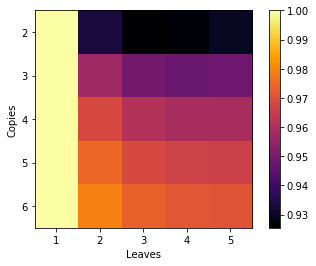

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(M, cmap = 'inferno')
plt.colorbar(im)

ax.set(xlabel = 'Leaves', ylabel = 'Copies')

plt.xticks(np.arange(5), 1 + np.arange(5))
plt.yticks(np.arange(5), 2 + np.arange(5))

# Numerical Jacobian Matrix

In [167]:
def numerical_jacobian(b):
    n = len(b)
    J = np.zeros((n,n))
    for i in range(n):
        J[i] = approx_fprime(b, 
                             f = lambda b: opt.W_from_b(b).sum(axis = 1)[i], 
                             epsilon = 1)

    return(J)

In [171]:
test_b = (np.random.rand(n) + 1)**6
# test_b = np.ones(n)
if opt.check_feasible(test_b):
    J = numerical_jacobian(test_b)
    vals = eig(J)[0]
    if np.all(vals > 0):
        print('positive definite')

positive definite


In [180]:
K = J.copy()
np.fill_diagonal(K, 0)
off = np.abs(K).sum(axis = 1)

In [181]:
np.abs(np.diag(J)) - off

array([ 2.48607039e-01,  1.04936639e+00,  1.05833058e+00,  1.07632149e+00,
        1.05554566e+00,  1.08938599e+00,  1.18815116e+00,  1.12344177e+00,
        1.07399450e+00,  1.05779507e+00,  1.04455207e+00,  1.08258312e+00,
        1.03918916e+00, -1.43339000e+01,  1.13510242e+00,  1.06463907e+00,
        1.03330678e+00,  1.15438948e+00,  8.03700032e-01,  1.10635322e+00,
       -1.15053037e+01,  5.05320246e-01,  7.07131666e-01,  1.18552149e+00,
        1.09276489e+00,  1.18772157e+00,  1.03398591e+00,  1.06386894e+00,
       -5.33672082e+00,  1.04136816e+00,  1.17128943e+00, -1.05511673e+00,
        1.12763915e+00,  1.14634507e+00,  1.07980774e+00,  4.04953017e-01,
        9.60360194e-01,  1.18803376e+00,  1.04426768e+00, -1.76386274e+00,
        1.11765423e+00,  1.18231645e+00,  1.04050767e+00,  1.06018385e+00,
        1.05227791e+00,  1.18710283e+00,  1.03912723e+00,  1.18597569e+00,
       -2.47044601e-01,  2.72811783e-01,  1.16920515e+00,  1.09836332e+00,
        1.08744922e+00,  

In [173]:
vals

array([155.21628775+0.j,  39.22408892+0.j,  28.80927752+0.j,
        23.19982379+0.j,  21.39924704+0.j,  17.85870543+0.j,
        16.8032008 +0.j,  15.79254384+0.j,  13.59360867+0.j,
        11.55748932+0.j,  11.20274694+0.j,  10.49362053+0.j,
         9.55866038+0.j,   9.1412051 +0.j,   8.52891549+0.j,
         8.15764732+0.j,   7.80340154+0.j,   7.53440154+0.j,
         6.54936281+0.j,   6.09036845+0.j,   5.34910752+0.j,
         5.31732117+0.j,   5.14815008+0.j,   4.67476634+0.j,
         4.31170467+0.j,   4.1758024 +0.j,   4.12334789+0.j,
         4.06713554+0.j,   4.10413483+0.j,   4.09482415+0.j,
         3.86084456+0.j,   3.64905258+0.j,   3.40320756+0.j,
         3.38420788+0.j,   3.2544169 +0.j,   3.09358755+0.j,
         3.02785432+0.j,   3.01941165+0.j,   2.88889404+0.j,
         2.70837747+0.j,   2.70514907+0.j,   2.68768428+0.j,
         2.64482442+0.j,   2.57353874+0.j,   2.52162344+0.j,
         2.48253127+0.j,   2.42863133+0.j,   2.28430992+0.j,
         2.25213719+0.j,

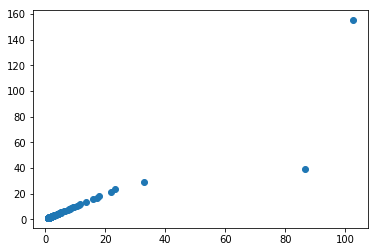

In [174]:
# Pretty much dominated by the diagonal
# Conj: J is diagonally dominant, and strictly so when b is larger than unity. 

plt.scatter(-np.sort(-np.diag(J)), vals)

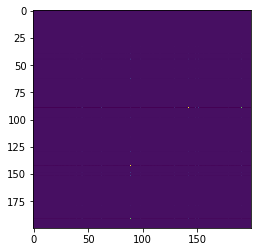

In [122]:
plt.imshow(J)

In [123]:
J

array([[ 0.00000000e+00, -3.33948177e-02, -3.46793465e-02, ...,
        -3.49567207e-02, -3.55196606e-02,  1.51850943e-02],
       [ 9.83237225e-05,  0.00000000e+00, -3.20739783e-04, ...,
        -3.29220711e-04, -3.47173401e-04,  1.70424041e-04],
       [ 2.47880170e-05, -6.95381956e-05,  0.00000000e+00, ...,
        -8.14038170e-05, -8.61914051e-05,  4.13678904e-05],
       ...,
       [ 1.48768926e-05, -4.14731991e-05, -4.73041766e-05, ...,
         0.00000000e+00, -5.15841005e-05,  2.46256175e-05],
       [ 2.29696018e-06, -6.32345398e-06, -7.24418192e-06, ...,
        -7.46100959e-06,  0.00000000e+00,  3.73957443e-06],
       [-1.54064007e-02, -7.00315990e-02, -7.17340438e-02, ...,
        -7.20969412e-02, -7.28282374e-02,  0.00000000e+00]])